In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

# Data Filtering

In [4]:
crime_nyc= pd.read_csv('NYPD_Complaint_Data_Historic.csv')

C:\Users\angel\AppData\Local\Temp\ipykernel_4444\3467850772.py:1: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_nyc= pd.read_csv('NYPD_Complaint_Data_Historic.csv')


In [ ]:
crime_nyc.head()

In [ ]:
# crime_nyc.info()

In [16]:
crime_nyc.describe()

,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude
count,6.983207e+06,6.981041e+06,6.983207e+06,6.977342e+06,6.977342e+06,6.959143e+06,6.959143e+06,157084.000000,6.959143e+06,6.959143e+06
mean,5.500768e+08,6.327224e+01,2.957909e+02,4.148457e+02,7.304343e-01,1.004796e+06,2.070544e+05,13.598400,4.073495e+01,-7.392583e+01
std,2.597838e+08,3.451961e+01,1.499370e+02,2.180586e+02,6.752324e+00,2.174732e+04,3.153994e+04,12.471429,8.647664e-02,7.842862e-02
min,1.000001e+08,-9.900000e+01,1.010000e+02,1.000000e+02,0.000000e+00,1.110000e+02,1.110000e+02,1.000000,4.011271e+01,-7.751921e+01
25%,3.252107e+08,4.000000e+01,1.170000e+02,2.540000e+02,0.000000e+00,9.916830e+05,1.843520e+05,3.000000,4.067261e+01,-7.397323e+01
50%,5.500624e+08,6.300000e+01,3.410000e+02,3.860000e+02,0.000000e+00,1.004370e+06,2.059660e+05,11.000000,4.073196e+01,-7.392733e+01
75%,7.750561e+08,9.400000e+01,3.510000e+02,6.370000e+02,0.000000e+00,1.016586e+06,2.351580e+05,30.000000,4.081212e+01,-7.388325e+01
max,9.999999e+08,1.230000e+02,8.810000e+02,9.750000e+02,9.700000e+01,1.067298e+06,7.250292e+06,34.000000,5.965727e+01,-7.368479e+01


In [18]:
crime_nyc.isnull().sum().sort_values(ascending=False)

PARKS_NM             6958159
STATION_NAME         6826123
TRANSIT_DISTRICT     6826123
HADEVELOPT           6637179
HOUSING_PSA          6446298
SUSP_AGE_GROUP       4707573
SUSP_SEX             3472346
SUSP_RACE            3339032
CMPLNT_TO_DT         1668376
CMPLNT_TO_TM         1663829
VIC_AGE_GROUP        1638444
LOC_OF_OCCUR_DESC    1479992
PREM_TYP_DESC          39732
Y_COORD_CD             24064
X_COORD_CD             24064
Lat_Lon                24064
Latitude               24064
Longitude              24064
OFNS_DESC              18825
BORO_NM                10894
PATROL_BORO             6322
PD_DESC                 5865
PD_CD                   5865
JURISDICTION_CODE       5865
ADDR_PCT_CD             2166
CMPLNT_FR_DT             655
VIC_RACE                 308
VIC_SEX                  307
CMPLNT_FR_TM              48
CRM_ATPT_CPTD_CD           7
JURIS_DESC                 0
LAW_CAT_CD                 0
KY_CD                      0
RPT_DT                     0
CMPLNT_NUM    

In [17]:
crime_nyc['CMPLNT_FR_TM'] = pd.to_datetime(crime_nyc['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce').dt.time
crime_nyc['CMPLNT_FR_TM'] = pd.to_datetime(crime_nyc['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce').dt.time
# CMPLNT_TO_TM
crime_nyc['CMPLNT_FR_DT'] = pd.to_datetime(crime_nyc['CMPLNT_FR_DT'], errors='coerce')
crime_nyc['CMPLNT_TO_DT'] = pd.to_datetime(crime_nyc['CMPLNT_TO_DT'], errors='coerce')
crime_nyc['RPT_DT'] = pd.to_datetime(crime_nyc['RPT_DT'], errors='coerce')
crime_nyc = crime_nyc.dropna(subset=['CMPLNT_FR_DT'])

In [178]:
crime_last3yrs = crime_nyc[
    (crime_nyc['CMPLNT_FR_DT'].dt.year >= 2017) &
    (crime_nyc['CMPLNT_FR_DT'].dt.year <= 2019)
]
crime_last3yrs.to_csv('nyc_crime_2017_2019_1.csv', index=False)
# crime_last5yrs.shape

# Filtered data

In [3]:
# crime_nyc= pd.read_csv('nyc_crime_2017_2019_1.csv')
crime_nyc= pd.read_csv('nyc_crime_2017_2019.csv')

In [4]:
crime_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397558 entries, 0 to 1397557
Data columns (total 32 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   CMPLNT_NUM         1397558 non-null  int64  
 1   CMPLNT_FR_DT       1397558 non-null  object 
 2   CMPLNT_FR_TM       1397558 non-null  object 
 3   CMPLNT_TO_DT       1201058 non-null  object 
 4   CMPLNT_TO_TM       1201759 non-null  object 
 5   ADDR_PCT_CD        1397555 non-null  float64
 6   RPT_DT             1397558 non-null  object 
 7   KY_CD              1397558 non-null  int64  
 8   OFNS_DESC          1397508 non-null  object 
 9   PD_CD              1396664 non-null  float64
 10  PD_DESC            1396664 non-null  object 
 11  CRM_ATPT_CPTD_CD   1397558 non-null  object 
 12  LAW_CAT_CD         1397558 non-null  object 
 13  BORO_NM            1396650 non-null  object 
 14  LOC_OF_OCCUR_DESC  1138500 non-null  object 
 15  PREM_TYP_DESC      1391892 non-n

In [6]:
crime_nyc['CMPLNT_FR_TM'] = pd.to_datetime(crime_nyc['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce').dt.time
crime_nyc['CMPLNT_FR_TM'] = pd.to_datetime(crime_nyc['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce').dt.time
# CMPLNT_TO_TM
crime_nyc['CMPLNT_FR_DT'] = pd.to_datetime(crime_nyc['CMPLNT_FR_DT'], errors='coerce')
crime_nyc['CMPLNT_TO_DT'] = pd.to_datetime(crime_nyc['CMPLNT_TO_DT'], errors='coerce')

crime_nyc['MONTH'] = crime_nyc['CMPLNT_FR_DT'].dt.month
crime_nyc['DAY_OF_WEEK'] = crime_nyc['CMPLNT_FR_DT'].dt.day_name()
crime_nyc['HOUR'] = pd.to_datetime(crime_nyc['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce').dt.hour

crime_nyc['RPT_DT'] = pd.to_datetime(crime_nyc['RPT_DT'], errors='coerce')
crime_nyc = crime_nyc.dropna(subset=['CMPLNT_FR_DT'])
crime_nyc['YEAR'] = crime_nyc['CMPLNT_FR_DT'].dt.year

In [8]:
crime_nyc.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,Lat_Lon,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,YEAR,CRIME_CATEGORY,MONTH,DAY_OF_WEEK,HOUR
0,671754904,2017-06-25,14:00:00,2017-06-25,14:15:00,13.0,2017-06-25,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,MANHATTAN,OPPOSITE OF,OPEN AREAS (OPEN LOTS),N.Y. POLICE DEPT,0.0,988958.0,209044.0,UNKNOWN,UNKNOWN,U,40.740461,-73.983012,"(40.740461082, -73.983011957)",PATROL BORO MAN SOUTH,45-64,WHITE,F,2017,CRIMES AGAINST WOMEN,6,Sunday,14
1,602484492,2017-03-26,12:00:00,2017-03-26,12:20:00,70.0,2017-03-26,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,CHAIN STORE,N.Y. POLICE DEPT,0.0,999240.0,169262.0,25-44,WHITE,F,40.631257,-73.945996,"(40.63125716, -73.945996398)",PATROL BORO BKLYN SOUTH,UNKNOWN,UNKNOWN,D,2017,CRIMES AGAINST PROPERTY,3,Sunday,12
2,820333215,2017-11-15,09:00:00,2017-11-15,09:05:00,46.0,2017-11-17,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",COMPLETED,MISDEMEANOR,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,1010511.0,252019.0,NaN,NaN,NaN,40.858378,-73.905067,"(40.858377933, -73.90506685)",PATROL BORO BRONX,UNKNOWN,UNKNOWN,E,2017,VIOLENT CRIMES,11,Wednesday,9
3,743567935,2017-08-06,14:00:00,NaT,NaN,72.0,2017-08-09,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,RESTAURANT/DINER,N.Y. POLICE DEPT,0.0,979515.0,171943.0,UNKNOWN,UNKNOWN,M,40.638627,-74.017062,"(40.638627351, -74.01706229)",PATROL BORO BKLYN SOUTH,45-64,ASIAN / PACIFIC ISLANDER,F,2017,PUBLIC ORDER OFFENSES,8,Sunday,14
4,270191245,2017-04-06,02:56:00,2017-04-06,03:09:00,121.0,2017-04-06,347,INTOXICATED & IMPAIRED DRIVING,905.0,"INTOXICATED DRIVING,ALCOHOL",COMPLETED,MISDEMEANOR,STATEN ISLAND,NaN,STREET,N.Y. POLICE DEPT,0.0,937779.0,166628.0,25-44,WHITE HISPANIC,M,40.623918,-74.167406,"(40.623918176, -74.167405965)",PATROL BORO STATEN ISLAND,UNKNOWN,UNKNOWN,E,2017,DRUG & ALCOHOL RELATED,4,Thursday,2


In [8]:
crime_nyc[crime_nyc['CRIME_CATEGORY'] == 'CRIMES AGAINST WOMEN']


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,Lat_Lon,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,YEAR,CRIME_CATEGORY,MONTH,DAY_OF_WEEK,HOUR
0,671754904,2017-06-25,14:00:00,2017-06-25,14:15:00,13.0,2017-06-25,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,MANHATTAN,OPPOSITE OF,OPEN AREAS (OPEN LOTS),N.Y. POLICE DEPT,0.0,988958.0,209044.0,UNKNOWN,UNKNOWN,U,40.740461,-73.983012,"(40.740461082, -73.983011957)",PATROL BORO MAN SOUTH,45-64,WHITE,F,2017,CRIMES AGAINST WOMEN,6,Sunday,14
19,785293756,2017-12-05,15:00:00,2017-12-05,15:05:00,45.0,2017-12-05,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BRONX,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2.0,1032930.0,239207.0,UNKNOWN,BLACK,M,40.823118,-73.824114,"(40.823117641, -73.824114397)",PATROL BORO BRONX,45-64,BLACK,F,2017,CRIMES AGAINST WOMEN,12,Tuesday,15
28,155825673,2017-06-16,11:30:00,2017-06-16,12:00:00,113.0,2017-06-16,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,QUEENS,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,1051447.0,194393.0,18-24,WHITE HISPANIC,M,40.699994,-73.757658,"(40.699993739, -73.757658355)",PATROL BORO QUEENS SOUTH,25-44,WHITE HISPANIC,F,2017,CRIMES AGAINST WOMEN,6,Friday,11
61,964712641,2017-09-24,15:45:00,NaT,NaN,107.0,2017-09-24,233,SEX CRIMES,681.0,"CHILD, ENDANGERING WELFARE",COMPLETED,MISDEMEANOR,QUEENS,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,1036790.0,205267.0,NaN,NaN,NaN,40.729939,-73.810433,"(40.729939364, -73.810433142)",PATROL BORO QUEENS SOUTH,18-24,WHITE HISPANIC,F,2017,CRIMES AGAINST WOMEN,9,Sunday,15
70,186534472,2017-01-12,13:03:00,NaT,NaN,109.0,2017-01-12,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,QUEENS,NaN,STREET,N.Y. POLICE DEPT,0.0,1030153.0,215586.0,25-44,WHITE HISPANIC,M,40.758299,-73.834309,"(40.758299326, -73.834309457)",PATROL BORO QUEENS NORTH,25-44,BLACK,M,2017,CRIMES AGAINST WOMEN,1,Thursday,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397535,461762281,2017-06-01,00:00:00,2019-02-14,23:59:00,75.0,2019-04-15,116,SEX CRIMES,168.0,SODOMY 1,COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2.0,NaN,NaN,25-44,WHITE HISPANIC,M,NaN,NaN,NaN,PATROL BORO BKLYN NORTH,<18,WHITE HISPANIC,F,2017,CRIMES AGAINST WOMEN,6,Thursday,0
1397541,902959278,2018-03-01,00:01:00,2019-03-27,10:00:00,88.0,2019-04-30,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,UNKNOWN,WHITE,M,NaN,NaN,NaN,PATROL BORO BKLYN NORTH,25-44,BLACK,M,2018,CRIMES AGAINST WOMEN,3,Thursday,0
1397546,539235652,2018-11-27,21:45:00,2018-11-27,21:46:00,28.0,2018-11-27,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,MANHATTAN,INSIDE,GROCERY/BODEGA,N.Y. POLICE DEPT,0.0,998093.0,231364.0,25-44,BLACK,M,40.801714,-73.950001,"(40.80171408, -73.950001039)",PATROL BORO MAN NORTH,45-64,ASIAN / PACIFIC ISLANDER,M,2018,CRIMES AGAINST WOMEN,11,Tuesday,21
1397547,249377210,2018-07-10,19:00:00,2018-07-10,20:00:00,14.0,2018-07-10,233,SEX CRIMES,175.0,"SEXUAL ABUSE 3,2",COMPLETED,MISDEMEANOR,MANHATTAN,NaN,TRANSIT - NYC SUBWAY,N.Y. TRANSIT POLICE,1.0,985679.0,213954.0,25-44,WHITE,M,40.753939,-73.994844,"(40.753938938, -73.994843655)",PATROL BORO MAN SOUTH,25-44,WHITE,F,2018,CRIMES AGAINST WOMEN,7,Tuesday,19


In [11]:
crime_nyc['YEAR'].value_counts()

YEAR
2018    477512
2017    469070
2019    450976
Name: count, dtype: int64

In [15]:
# crime_nyc['HADEVELOPT'].value_counts()

In [17]:
crime_nyc['CRM_ATPT_CPTD_CD'].value_counts()

CRM_ATPT_CPTD_CD
COMPLETED    1374233
ATTEMPTED      23325
Name: count, dtype: int64

In [19]:
crime_nyc['OFNS_DESC'].unique()

array(['HARRASSMENT 2', 'PETIT LARCENY', 'DANGEROUS WEAPONS',
       'OFF. AGNST PUB ORD SENSBLTY &', 'INTOXICATED & IMPAIRED DRIVING',
       'FELONY ASSAULT', 'GRAND LARCENY',
       'CRIMINAL MISCHIEF & RELATED OF', 'OFFENSES AGAINST PUBLIC ADMINI',
       'ASSAULT 3 & RELATED OFFENSES', 'ROBBERY', 'DANGEROUS DRUGS',
       'BURGLARY', 'MURDER & NON-NEGL. MANSLAUGHTER',
       'OFFENSES AGAINST THE PERSON', 'SEX CRIMES', 'CRIMINAL TRESPASS',
       'VEHICLE AND TRAFFIC LAWS', 'GRAND LARCENY OF MOTOR VEHICLE',
       'ARSON', 'MISCELLANEOUS PENAL LAW', 'THEFT-FRAUD',
       'POSSESSION OF STOLEN PROPERTY', 'FRAUDS', 'ADMINISTRATIVE CODE',
       'GAMBLING', 'FORGERY', 'RAPE', 'FRAUDULENT ACCOSTING',
       'THEFT OF SERVICES', 'OFFENSES INVOLVING FRAUD',
       'OTHER OFFENSES RELATED TO THEF', 'UNAUTHORIZED USE OF A VEHICLE',
       'OTHER STATE LAWS (NON PENAL LA', 'ENDAN WELFARE INCOMP',
       "BURGLAR'S TOOLS", 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
       'NYS LAWS-UNCLASSIFIE

C:\Users\angel\AppData\Local\Temp\ipykernel_12164\2893561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='viridis')


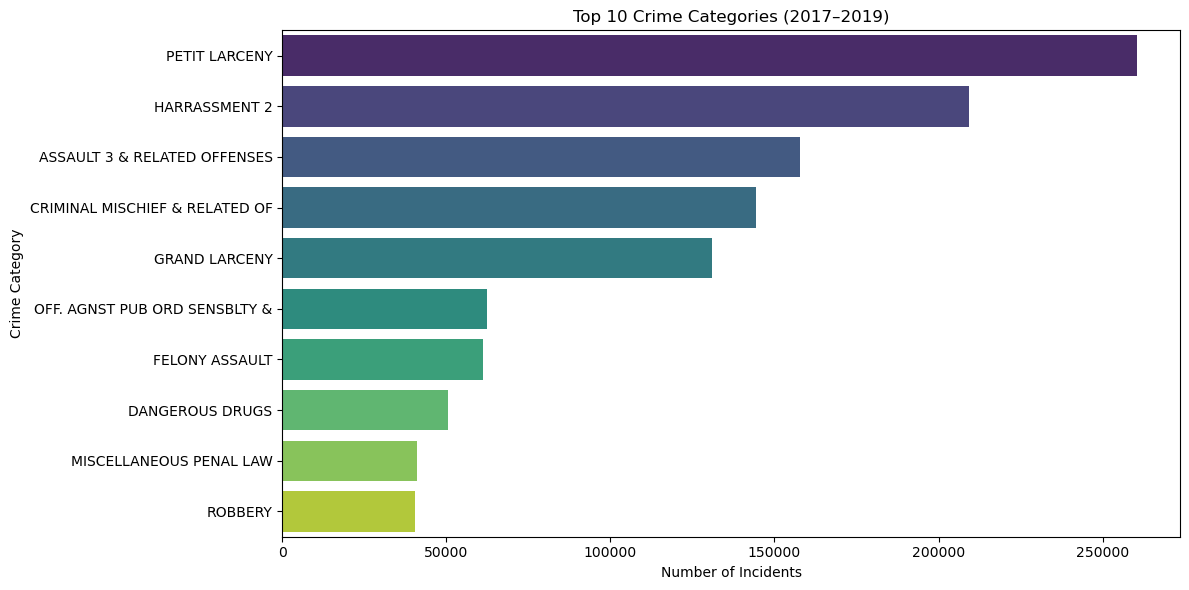

In [21]:
top_crimes = crime_nyc['OFNS_DESC'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='viridis')
plt.title('Top 10 Crime Categories (2017–2019)')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Category')
plt.tight_layout()
plt.show()


C:\Users\angel\AppData\Local\Temp\ipykernel_23104\1641609808.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_counts.index, y=borough_counts.values, palette='Set2')


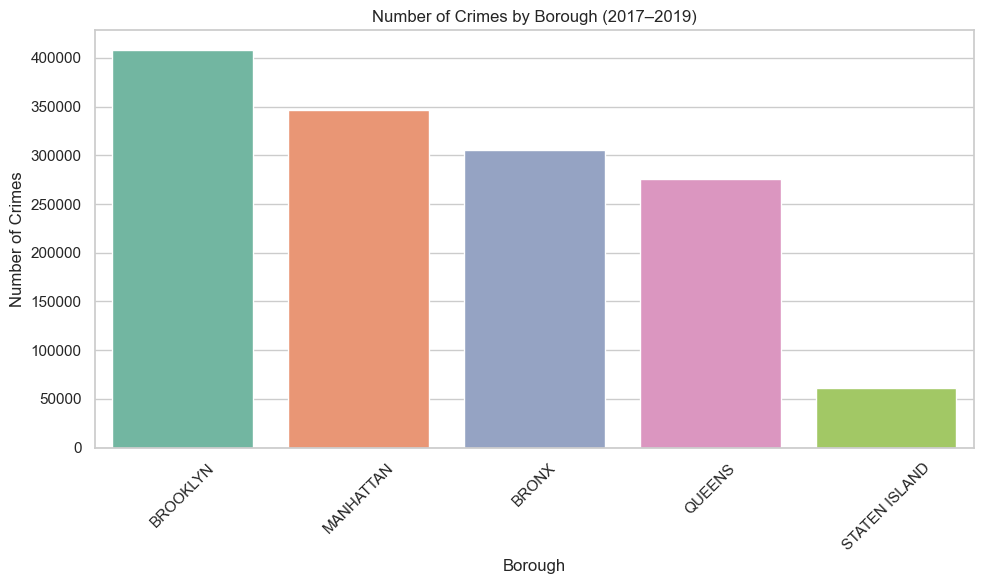

In [19]:
borough_counts = crime_nyc['BORO_NM'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=borough_counts.index, y=borough_counts.values, palette='Set2')
plt.title('Number of Crimes by Borough (2017–2019)')
plt.xlabel('Borough')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


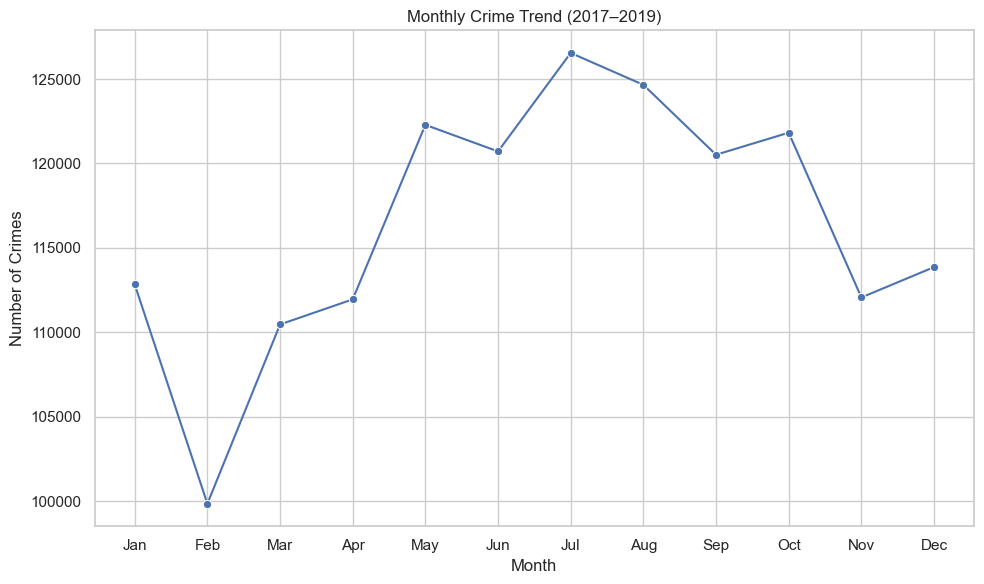

In [20]:
crime_nyc['MONTH'] = crime_nyc['CMPLNT_FR_DT'].dt.month
monthly_counts = crime_nyc['MONTH'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Monthly Crime Trend (2017–2019)')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
crime_nyc = crime_nyc.replace({
    'HARRASSMENT 2': 'HARASSMENT', 
    'ESCAPE 3': 'ESCAPE',
    'ASSAULT 3 & RELATED OFFENSES': 'ASSAULT & RELATED OFFENSES',
    'CRIMINAL MISCHIEF & RELATED OF': 'CRIMINAL MISCHIEF',
    'OFF. AGNST PUB ORD SENSBLTY &': 'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION',
    'OTHER STATE LAWS (NON PENAL LA': 'OTHER STATE LAWS (NON PENAL LAW)',
    'ENDAN WELFARE INCOMP': 'ENDANGERING WELFARE OF INCOMPETENT',
    'AGRICULTURE & MRKTS LAW-UNCLASSIFIED': 'AGRICULTURE & MARKETS LAW',
    'DISRUPTION OF A RELIGIOUS SERV': 'DISRUPTION OF A RELIGIOUS SERVICE',
    'LOITERING/GAMBLING (CARDS, DIC': 'GAMBLING',
    'OFFENSES AGAINST MARRIAGE UNCL': 'OFFENSES AGAINST MARRIAGE',
    

    'E': 'UNKNOWN',
    'D': 'BUSINESS/ORGANIZATION',
    'F': 'FEMALE',
    'M': 'MALE'
}).copy()


In [41]:
crime_nyc['VIC_SEX'].value_counts()

VIC_SEX
FEMALE                   553182
MALE                     479467
BUSINESS/ORGANIZATION    194889
UNKNOWN                  170015
U                             1
Name: count, dtype: int64

In [37]:
crime_nyc.OFNS_DESC.value_counts().iloc[:10]

OFNS_DESC
PETIT LARCENY                                   260562
HARASSMENT                                      209362
ASSAULT & RELATED OFFENSES                      157824
CRIMINAL MISCHIEF                               144406
GRAND LARCENY                                   131057
OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION     62257
FELONY ASSAULT                                   61134
DANGEROUS DRUGS                                  50533
MISCELLANEOUS PENAL LAW                          40955
ROBBERY                                          40302
Name: count, dtype: int64

In [ ]:
crime_nyc['']

In [134]:
# crime_categories = {
#     'CRIMES AGAINST PROPERTY': [
#         'PETIT LARCENY', 'GRAND LARCENY', 'BURGLARY',
#         'POSSESSION OF STOLEN PROPERTY', 'THEFT OF SERVICES',
#         'GRAND LARCENY OF MOTOR VEHICLE', 'FORGERY',
#         'CRIMINAL MISCHIEF & RELATED OF', 'CRIMINAL MISCHIEF & RELATED OFFENSES',
#         'OTHER OFFENSES RELATED TO THEF', 'OTHER OFFENSES RELATED TO THEFT',
#         'POSSESSION OF STOLEN PROPERTY 5', 'THEFT-FRAUD',
#         'PETIT LARCENY OF MOTOR VEHICLE'
#     ],
#     'VIOLENT CRIMES': [
#         'ROBBERY', 'FELONY ASSAULT', 'ASSAULT 3 & RELATED OFFENSES',
#         'MURDER & NON-NEGL. MANSLAUGHTE', 'MURDER & NON-NEGL. MANSLAUGHTER',
#         'FRAUDULENT ACCOSTING', 'KIDNAPPING', 'KIDNAPPING & RELATED OFFENSES',
#         'KIDNAPPING AND RELATED OFFENSES', 'ARSON',
#         'CRIMINAL TRESPASS',
#         'DANGEROUS WEAPONS',  
#         'UNLAWFUL POSS. WEAP. ON SCHOOL' 
#     ],
#     'CRIMES AGAINST WOMEN': [
#         'RAPE', 'SEX CRIMES', 'FELONY SEX CRIMES',
#         'FORCIBLE TOUCHING', 'PROSTITUTION & RELATED OFFENSES',
#         'HARASSMENT', 'HARRASSMENT 2',
#         'ENDAN WELFARE INCOMP', 'OFFENSES RELATED TO CHILDREN',
#         'CHILD ABANDONMENT/NON SUPPORT', 'CHILD ABANDONMENT/NON SUPPORT 1',
#         'OFFENSES AGAINST MARRIAGE UNCL', 
#         'ABORTION'  
#     ],
#     'DRUG & ALCOHOL RELATED': [
#         'DANGEROUS DRUGS', 'ALCOHOLIC BEVERAGE CONTROL LAW',
#         'INTOXICATED & IMPAIRED DRIVING', 'INTOXICATED/IMPAIRED DRIVING',
#         'LOITERING FOR DRUG PURPOSES',
#         'UNDER THE INFLUENCE OF DRUGS' 
#     ],
#     'PUBLIC ORDER OFFENSES': [
#         'DISORDERLY CONDUCT', 'GAMBLING', 'JOSTLING', 'LOITERING',
#         'LOITERING/GAMBLING (CARDS, DIC)', 'LOITERING/GAMBLING (CARDS, DICE, ETC)',
#         'OFF. AGNST PUB ORD SENSBLTY &', 'OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV',
#         'DISRUPTION OF A RELIGIOUS SERV', 'DISRUPTION OF A RELIGIOUS SERVICE',
#         'FORTUNE TELLING'  
#     ],
#     'TRAFFIC OFFENSES': [
#         'VEHICLE AND TRAFFIC LAWS', 'MOVING INFRACTIONS',
#         'OTHER TRAFFIC INFRACTION', 'PARKING OFFENSES'
#     ],
#     'ADMINISTRATIVE & MISCELLANEOUS': [
#         'ADMINISTRATIVE CODE', 'ADMINISTRATIVE CODES', 'NEW YORK CITY HEALTH CODE',
#         'OTHER STATE LAWS', 'OTHER STATE LAWS (NON PENAL LA)', 'OTHER STATE LAWS (NON PENAL LAW)',
#         'NYS LAWS-UNCLASSIFIED FELONY', 'MISCELLANEOUS PENAL LAW',
#         'ANTICIPATORY OFFENSES', 'OFFENSES AGAINST PUBLIC SAFETY',
#         'F.C.A. P.I.N.O.S.', 'ESCAPE 3', 'UNAUTHORIZED USE OF A VEHICLE',
#         'UNAUTHORIZED USE OF A VEHICLE 3 (UUV)', "BURGLAR'S TOOLS",
#         'FOR OTHER AUTHORITIES', 'OFFENSES AGAINST THE PERSON',
#         'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST PUBLIC ADMINISTRATION',
#         'OFFENSES INVOLVING FRAUD', 'FRAUDS',
#         'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',  
#         'NYS LAWS-UNCLASSIFIED VIOLATION' 
#     ]
# }


In [136]:
# def crime_category(offense):
#     for category, offenses in crime_categories.items():
#         if offense in offenses:
#             return category
#     return 'UNCATEGORIZED'

# crime_nyc['CRIME_CATEGORY'] = crime_nyc['OFNS_DESC'].apply(crime_category)


In [138]:
crime_nyc.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,YEAR,CRIME_CATEGORY
0,700381962,2015-05-28,15:00:00,NaT,NaN,46.0,2015-06-01,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1007522.0,247458.0,25-44,BLACK,M,NaN,40.845868,-73.915888,"(40.84586773, -73.915888033)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F,2015,CRIMES AGAINST WOMEN
1,492142357,2016-04-13,00:00:00,NaT,NaN,40.0,2016-04-13,351,CRIMINAL MISCHIEF & RELATED OF,258.0,"CRIMINAL MISCHIEF 4TH, GRAFFIT",COMPLETED,MISDEMEANOR,BRONX,NaN,HIGHWAY/PARKWAY,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1005028.0,234516.0,NaN,NaN,NaN,NaN,40.810352,-73.924942,"(40.810351863, -73.924942326)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E,2016,CRIMES AGAINST PROPERTY
2,671754904,2017-06-25,14:00:00,2017-06-25,14:15:00,13.0,2017-06-25,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,MANHATTAN,OPPOSITE OF,OPEN AREAS (OPEN LOTS),N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,988958.0,209044.0,UNKNOWN,UNKNOWN,U,NaN,40.740461,-73.983012,"(40.740461082, -73.983011957)",PATROL BORO MAN SOUTH,NaN,45-64,WHITE,F,2017,CRIMES AGAINST WOMEN
3,467512872,2016-10-28,12:00:00,2017-02-27,12:15:00,81.0,2017-02-27,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1006656.0,186666.0,NaN,NaN,NaN,NaN,40.679012,-73.919221,"(40.679011668, -73.919220684)",PATROL BORO BKLYN NORTH,NaN,65+,BLACK,F,2016,CRIMES AGAINST PROPERTY
4,602484492,2017-03-26,12:00:00,2017-03-26,12:20:00,70.0,2017-03-26,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,CHAIN STORE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,999240.0,169262.0,25-44,WHITE,F,NaN,40.631257,-73.945996,"(40.63125716, -73.945996398)",PATROL BORO BKLYN SOUTH,NaN,UNKNOWN,UNKNOWN,D,2017,CRIMES AGAINST PROPERTY


In [140]:
crime_nyc['CRIME_CATEGORY'].value_counts()

CRIME_CATEGORY
CRIMES AGAINST PROPERTY           1045980
VIOLENT CRIMES                     506920
CRIMES AGAINST WOMEN               379002
ADMINISTRATIVE & MISCELLANEOUS     155778
DRUG & ALCOHOL RELATED             124345
PUBLIC ORDER OFFENSES              107642
TRAFFIC OFFENSES                    32833
UNCATEGORIZED                        2833
Name: count, dtype: int64

In [142]:
crime_nyc[crime_nyc['CRIME_CATEGORY'] == 'UNCATEGORIZED']['OFNS_DESC'].unique()


array([nan, 'OTHER STATE LAWS (NON PENAL LA',
       'LOITERING/GAMBLING (CARDS, DIC', 'HOMICIDE-NEGLIGENT,UNCLASSIFIE',
       'HOMICIDE-NEGLIGENT-VEHICLE'], dtype=object)

In [144]:
crime_nyc['SUSP_SEX'].value_counts()

SUSP_SEX
M    1065079
U     331580
F     325509
Name: count, dtype: int64

In [146]:
crime_nyc['CMPLNT_TO_DT'].describe()

count                          1986022
mean     2017-07-14 16:14:59.765259520
min                2007-07-20 00:00:00
25%                2016-04-20 00:00:00
50%                2017-07-21 00:00:00
75%                2018-10-12 00:00:00
max                2081-07-19 00:00:00
Name: CMPLNT_TO_DT, dtype: object

In [148]:
crime_nyc['CMPLNT_TO_DT'].value_counts().sort_values()

CMPLNT_TO_DT
2081-07-19       1
2007-07-20       1
2017-03-14     540
2016-01-23     551
2016-01-24     612
              ... 
2019-01-03    1361
2018-07-05    1361
2019-01-02    1381
2018-12-31    1445
2019-01-01    1582
Name: count, Length: 1828, dtype: int64

In [150]:
#INCORRECT DATE 2081-07-19
crime_nyc = crime_nyc[crime_nyc['CMPLNT_TO_DT'] != pd.to_datetime('2081-07-19')]

In [152]:
crime_nyc['LAW_CAT_CD'].value_counts()

LAW_CAT_CD
MISDEMEANOR    1284508
FELONY          728890
VIOLATION       341934
Name: count, dtype: int64

In [154]:
crime_nyc['CRIME_CATEGORY'].value_counts()

CRIME_CATEGORY
CRIMES AGAINST PROPERTY           1045980
VIOLENT CRIMES                     506920
CRIMES AGAINST WOMEN               379001
ADMINISTRATIVE & MISCELLANEOUS     155778
DRUG & ALCOHOL RELATED             124345
PUBLIC ORDER OFFENSES              107642
TRAFFIC OFFENSES                    32833
UNCATEGORIZED                        2833
Name: count, dtype: int64

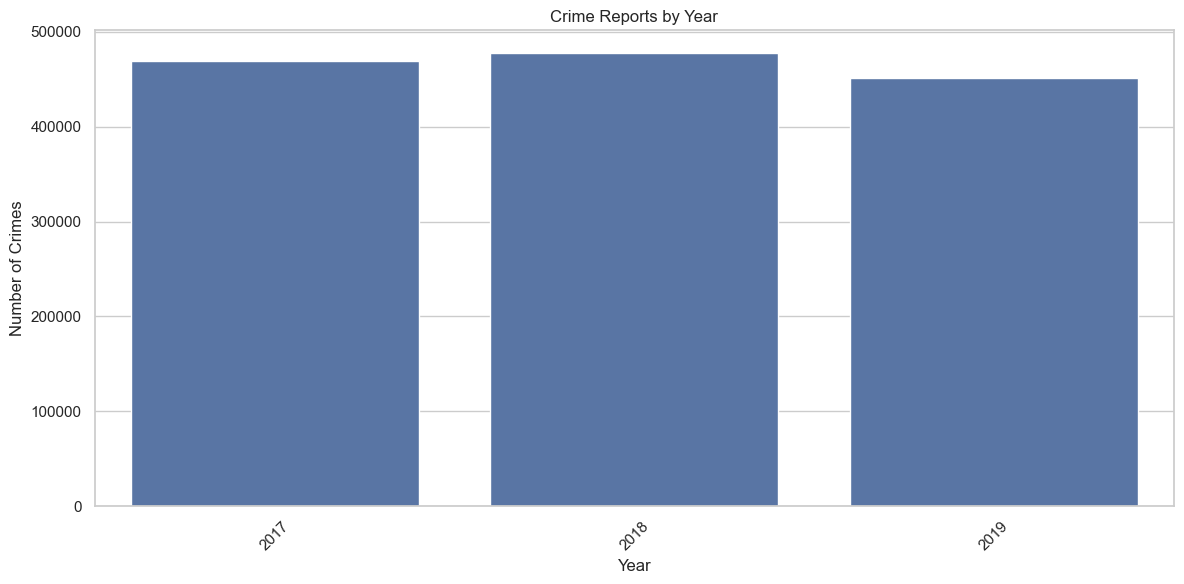

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(data=crime_nyc, x='YEAR', order=sorted(crime_nyc['YEAR'].dropna().unique()))
plt.title('Crime Reports by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [169]:
crime_nyc.shape

(2355332, 32)

In [167]:
crime_nyc.isnull().sum()

CMPLNT_NUM                0
CMPLNT_FR_DT              0
CMPLNT_FR_TM              0
CMPLNT_TO_DT         369311
CMPLNT_TO_TM         368223
ADDR_PCT_CD               4
RPT_DT                    0
KY_CD                     0
OFNS_DESC              1274
PD_CD                  1570
PD_DESC                1570
CRM_ATPT_CPTD_CD          0
LAW_CAT_CD                0
BORO_NM                1596
LOC_OF_OCCUR_DESC    454010
PREM_TYP_DESC          9698
JURIS_DESC                0
JURISDICTION_CODE      1570
X_COORD_CD             6174
Y_COORD_CD             6174
SUSP_AGE_GROUP       738451
SUSP_RACE            633165
SUSP_SEX             633165
Latitude               6174
Longitude              6174
Lat_Lon                6174
PATROL_BORO            1570
VIC_AGE_GROUP        107128
VIC_RACE                  6
VIC_SEX                   6
YEAR                      0
CRIME_CATEGORY            0
dtype: int64

In [171]:
# crime_nyc.drop(['PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'STATION_NAME', 'TRANSIT_DISTRICT'], axis=1, inplace=True)

In [ ]:
crime_nyc.isnull().sum()

In [116]:
crime_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2355332 entries, 0 to 2355332
Data columns (total 32 columns):
 #   Column             Dtype         
---  ------             -----         
 0   CMPLNT_NUM         int64         
 1   CMPLNT_FR_DT       datetime64[ns]
 2   CMPLNT_FR_TM       object        
 3   CMPLNT_TO_DT       datetime64[ns]
 4   CMPLNT_TO_TM       object        
 5   ADDR_PCT_CD        float64       
 6   RPT_DT             datetime64[ns]
 7   KY_CD              int64         
 8   OFNS_DESC          object        
 9   PD_CD              float64       
 10  PD_DESC            object        
 11  CRM_ATPT_CPTD_CD   object        
 12  LAW_CAT_CD         object        
 13  BORO_NM            object        
 14  LOC_OF_OCCUR_DESC  object        
 15  PREM_TYP_DESC      object        
 16  JURIS_DESC         object        
 17  JURISDICTION_CODE  float64       
 18  X_COORD_CD         float64       
 19  Y_COORD_CD         float64       
 20  SUSP_AGE_GROUP     object    

In [173]:
crime_nyc.to_csv('nyc_crime_2015_2019_clean.csv', index=False)

In [175]:
crime_nyc_last3yrs = crime_nyc[
    (crime_nyc['CMPLNT_FR_DT'].dt.year >= 2017) &
    (crime_nyc['CMPLNT_FR_DT'].dt.year <= 2019)
]
crime_nyc_last3yrs.to_csv('nyc_crime_2017_2019.csv', index=False)
# crime_last3yrs.shape